# Air quality project

## Project and data description

### Project

czy potrzeba stacji więcej/ mniej. 

zrobić wizualizacje/ mapkę czy są zagęszone

Jak zwiększenie w konkretnych miejsacach wpłynie na zanieczyszczenie w pozostalych? 

jaka gęstość czujników? 

Jaka jest rzeźba terenu? Kraków jest w niecce. 

### Data

The dataset consists air quality data (the concentrations of particulate matter PM1, PM2.5 and PM10, temperature, air pressure and humidity) from 2017 generated by network of 56 low-cost sensors located in Krakow, Poland.

### The goal

## Preprocessing and analysis

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import folium
import random
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def create_data_frame(path_to_files, file_name_end):
    all_data = []
    all_files = glob.glob(os.path.join(path_to_files,file_name_end))
    
    for path in all_files:
        frame = pd.read_csv(path)
        all_data.append(frame)
    
    df = pd.concat(all_data, axis=0, ignore_index=True)
    
    return df

In [3]:
root_path = r'C:\Users\User\PycharmProjects\Air_quality\Data_files'
file_name_like = '*2017.csv'

df = create_data_frame(root_path, file_name_like)

In [4]:
df

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,94.0,101837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,92.0,101834.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.0,94.0,101832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,2017-09-30T19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,83.0,102373.0,...,102337.0,35.0,35.0,72.0,8.0,83.0,102383.0,37.0,36.0,67.0
8589,2017-09-30T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,8.0,83.0,102374.0,...,102341.0,36.0,37.0,76.0,8.0,83.0,102391.0,37.0,37.0,69.0
8590,2017-09-30T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.0,90.0,102380.0,...,102349.0,38.0,39.0,79.0,6.0,90.0,102402.0,45.0,45.0,79.0
8591,2017-09-30T22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.0,88.0,102380.0,...,102355.0,44.0,44.0,87.0,6.0,88.0,102408.0,46.0,46.0,79.0


In [5]:
def sort_by_column(frame, column_name):
    sorted_frame = frame.sort_values(by=column_name)
    sorded_frame = sorted_frame.reset_index(drop=True)
    
    return sorted_frame

In [6]:
df = sort_by_column(df, 'UTC time')
df

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
2713,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2714,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2715,2017-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2716,2017-01-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2717,2017-01-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2017-12-24T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,87.0,101736.0,...,101726.0,12.0,15.0,31.0,5.0,85.0,101798.0,13.0,15.0,26.0
2037,2017-12-24T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,88.0,101776.0,...,101771.0,12.0,14.0,29.0,5.0,85.0,101840.0,12.0,13.0,23.0
2038,2017-12-24T22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,101785.0,...,101788.0,10.0,12.0,26.0,5.0,82.0,101839.0,10.0,12.0,21.0
2039,2017-12-24T23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,88.0,101782.0,...,101774.0,9.0,11.0,24.0,5.0,85.0,101837.0,10.0,12.0,21.0


In [7]:
def number_of_Nans(data_frame):
    print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        print(column,': ', data_frame[column].isnull().sum())

### Sensor location

In [8]:
def upload_sensor_frame(file_path):
    
    sensor_loc_path = file_path
    sensor_loc_df = pd.read_csv(sensor_loc_path)
    #sensor_loc_df.set_index('id', drop=True)
    
    return sensor_loc_df

In [9]:
sensor_loc_path = r'C:\Users\User\PycharmProjects\Air_quality\Data_files\sensor_locations.csv'
location_frame = upload_sensor_frame(sensor_loc_path)
#location_frame

In [10]:
area_kinds= ['residual', 'industrial', 'services_and_trade', 'recreation', 'transportation']

random_areas = random.choices(area_kinds, k=56)

location_frame['area_kind'] = random_areas

In [11]:
# location_frame

,id,latitude,longitude,area_kind
0,3,50.057748,19.961375,residual
1,140,50.057747,19.961374,industrial
2,142,50.084816,19.878066,industrial
3,147,50.048924,19.962262,transportation
4,169,50.048699,20.101569,residual
5,170,50.077467,19.895577,recreation
6,171,50.084134,19.968416,services_and_trade
7,172,50.073094,19.886750,services_and_trade
8,173,50.057537,19.897547,recreation
9,174,50.057242,19.914874,industrial


In [12]:
def create_a_map(start_point, zoom):

    sensor_loc_map = folium.Map(
                                location=start_point,
                                zoom_start= zoom
                              )
    return sensor_loc_map

In [13]:
location=[50.057748,19.961375]
initial_zoom=12

empty_map = create_a_map(location, initial_zoom)

In [14]:
def add_markers(location_df, my_map):
    for _, sensor in location_df.iterrows():
        if sensor['area_kind'] == 'industrial':
                icon_color = 'red'
        elif sensor['area_kind'] == 'residual':
                icon_color = 'yellow'
        elif sensor['area_kind'] == 'transportation':
                icon_color='gray'
        elif sensor['area_kind'] == 'services_and_trade':
                icon_color='blue'
        elif sensor['area_kind'] == 'recreation':
                icon_color='green'
        else:
            icon_color='blue'
        
        folium.Marker(location = [sensor['latitude'], sensor['longitude']],
                      #popup=sensor['id'],
                      tooltip=sensor['id'],
                      icon=folium.Icon(color=icon_color)
                     ).add_to(my_map)

    return my_map
        
sensor_map = add_markers(location_frame, empty_map)
#sensor_map

C:\Users\User\AppData\Local\Temp\ipykernel_11064\1835460934.py:19: UserWarning: color argument of Icon should be one of: {'lightred', 'lightgreen', 'beige', 'lightgray', 'gray', 'darkpurple', 'blue', 'darkgreen', 'black', 'orange', 'cadetblue', 'darkblue', 'lightblue', 'purple', 'red', 'white', 'pink', 'darkred', 'green'}.
  icon=folium.Icon(color=icon_color)


In [15]:
sensor_map.save('Sensor_map.html')

### Data in time

In [16]:
df = df.reset_index(drop=True)

In [17]:
df['UTC time'] = pd.to_datetime(df['UTC time'])

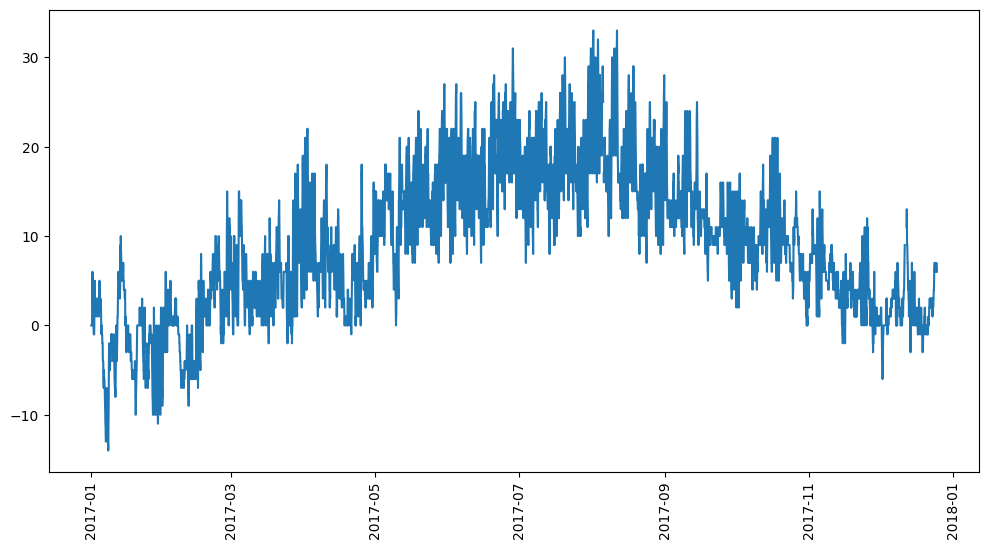

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
plt.locator_params(axis='x', nbins=20)
ax.plot(df['UTC time'], df['220_temperature'])
ax.xaxis.set_tick_params(rotation=90)
#plt.plot(df['UTC time'], df['3_temperature'])
plt.show()

In [19]:
df.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def get_sensor_ids(data_frame):
    sensor_ids=[]
    for column in data_frame.columns:
        id = column.partition('_')[0]
        if id.isdigit():
            sensor_ids.append(id)
    ids = set(sensor_ids)
    ids = list(ids)
    # ids.sort()
    return ids

In [29]:
sensor_ids = get_sensor_ids(df)
# sensor_ids

['179',
 '178',
 '204',
 '171',
 '176',
 '192',
 '205',
 '216',
 '185',
 '201',
 '226',
 '181',
 '219',
 '713',
 '170',
 '218',
 '177',
 '220',
 '857',
 '228',
 '223',
 '140',
 '209',
 '263',
 '202',
 '183',
 '227',
 '172',
 '147',
 '221',
 '622',
 '895',
 '214',
 '180',
 '222',
 '212',
 '169',
 '195',
 '182',
 '196',
 '184',
 '187',
 '189',
 '203',
 '215',
 '194',
 '210',
 '808',
 '174',
 '173',
 '208',
 '225',
 '3',
 '211',
 '142',
 '213']

In [48]:
def get_columns(all_sensors_frame, sensor_list):
    all_columns=[]
    for sensor_id in sensor_list:
        sensor_id = str(sensor_id)
        sensor_columns = [column_name for column_name in all_sensors_frame.columns if column_name.startswith(sensor_id)]
        all_columns.append(sensor_columns)
    
    return all_columns

all_columns = get_columns(df, sensor_ids)
all_columns

[['179_temperature',
  '179_humidity',
  '179_pressure',
  '179_pm1',
  '179_pm25',
  '179_pm10'],
 ['178_temperature',
  '178_humidity',
  '178_pressure',
  '178_pm1',
  '178_pm25',
  '178_pm10'],
 ['204_temperature',
  '204_humidity',
  '204_pressure',
  '204_pm1',
  '204_pm25',
  '204_pm10'],
 ['171_temperature',
  '171_humidity',
  '171_pressure',
  '171_pm1',
  '171_pm25',
  '171_pm10'],
 ['176_temperature',
  '176_humidity',
  '176_pressure',
  '176_pm1',
  '176_pm25',
  '176_pm10'],
 ['192_temperature',
  '192_humidity',
  '192_pressure',
  '192_pm1',
  '192_pm25',
  '192_pm10'],
 ['205_temperature',
  '205_humidity',
  '205_pressure',
  '205_pm1',
  '205_pm25',
  '205_pm10'],
 ['216_temperature',
  '216_humidity',
  '216_pressure',
  '216_pm1',
  '216_pm25',
  '216_pm10'],
 ['185_temperature',
  '185_humidity',
  '185_pressure',
  '185_pm1',
  '185_pm25',
  '185_pm10'],
 ['201_temperature',
  '201_humidity',
  '201_pressure',
  '201_pm1',
  '201_pm25',
  '201_pm10'],
 ['226_tem

In [31]:
all_columns[0]

['179_temperature',
 '179_humidity',
 '179_pressure',
 '179_pm1',
 '179_pm25',
 '179_pm10']

In [37]:
def get_series(data_frame, columns):
    all_series = []
    for column_name in columns:
        series = data_frame[column_name]
        all_series.append(series)
    return all_series

New_frame_series = get_series(df, all_columns[0])

pandas.core.series.Series

In [38]:
df_205 = pd.concat(New_frame_series, axis=1)
df_205

,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10
0,0.0,55.0,NaN,92.0,107.0,169.0
1,0.0,54.0,NaN,90.0,105.0,166.0
2,0.0,55.0,NaN,101.0,119.0,188.0
3,-1.0,54.0,NaN,97.0,115.0,182.0
4,-1.0,54.0,NaN,92.0,107.0,171.0
...,...,...,...,...,...,...
8588,6.0,86.0,101810.0,15.0,17.0,27.0
8589,5.0,86.0,101849.0,14.0,16.0,27.0
8590,5.0,83.0,101852.0,12.0,13.0,22.0
8591,5.0,85.0,101858.0,11.0,12.0,20.0


In [ ]:
# def create_sensor_frame(all_sensors_frame, columns_for_frame):
# data_for_frame = all_sensors_frame['UTC time']+columns_for_frame
# data_for_frame = df['UTC time']+New_frame_series

In [41]:
len(df['UTC time'])

8593

In [45]:
int(sensor_ids[0])

179

In [46]:
id_series = pd.Series(int(sensor_ids[0]), index=range(len(df['UTC time'])))
id_series

0       179
1       179
2       179
3       179
4       179
       ... 
8588    179
8589    179
8590    179
8591    179
8592    179
Length: 8593, dtype: int64

In [64]:
data_for_frame = list[id_series, df['UTC time'], New_frame_series]

data_for_frame = list(id_series)+list(df['UTC time'])+New_frame_series


df_179 = pd.concat(data_for_frame, axis=1)

TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid

In [51]:
df_179

,179_temperature,179_humidity,179_pressure,179_pm1,179_pm25,179_pm10
0,0.0,55.0,NaN,92.0,107.0,169.0
1,0.0,54.0,NaN,90.0,105.0,166.0
2,0.0,55.0,NaN,101.0,119.0,188.0
3,-1.0,54.0,NaN,97.0,115.0,182.0
4,-1.0,54.0,NaN,92.0,107.0,171.0
...,...,...,...,...,...,...
8588,6.0,86.0,101810.0,15.0,17.0,27.0
8589,5.0,86.0,101849.0,14.0,16.0,27.0
8590,5.0,83.0,101852.0,12.0,13.0,22.0
8591,5.0,85.0,101858.0,11.0,12.0,20.0


In [55]:
type(New_frame_series)

list